In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from osgeo import gdal

In [4]:
import matplotlib.pyplot as plt

In [13]:
dataset = gdal.Open('/content/drive/MyDrive/GIS/utica/u_train/train_1.tif', gdal.GA_ReadOnly)

In [14]:
band = dataset.GetRasterBand(1)

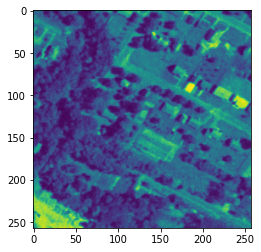

In [15]:
plt.imshow(band.ReadAsArray())

In [16]:
dataset2 = gdal.Open('/content/drive/MyDrive/GIS/utica/u_train/train_2.tif', gdal.GA_ReadOnly)

In [17]:
band2 = dataset2.GetRasterBand(1)

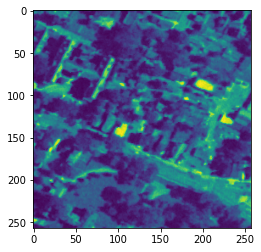

In [18]:
plt.imshow(band2.ReadAsArray())